# Introduction:
Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. Sincere questions are inquiries about which individuals genuinely want to know an answer or gain information from rather than argue a point or make a statement. For instance, “What are some sleep hacks and tips?” is deemed as sincere since it is a candid question which is most likely asked by an individual who would like some advice on falling asleep. On the other hand, insincere questions intend to make some sort of a statement and are usually asked not with the intention of receiving a helpful answer/comment. It is often the case that insincere questions target religion, gender, politics, etc. and are constructed in a non-neutral tone, are exaggerated, or use words that attack various groups. For example, "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?" is classified as insincere since it targets the Black community and is phrased in a demeaning manner. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.


## Quora Insincere Questions Exploratory Data Analysis ##
We will explore the training & Testing data in order to come up with insights and a plan for modeling.

In [1]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import copy
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
import gc #garbage collector
import time
from gensim.utils import lemmatize
from pattern.en import parse

#------------------------------------------------------------------------#
import re #regular expression/pattern matching
import random
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#------------------------------------------------------------------------#

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import sys
print('Python: {}'.format(sys.version))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


# Load data and print shape & head

In [3]:
original_train = pd.read_csv('train.csv')
original_test = pd.read_csv('test.csv')

In [4]:
original_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
original_test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
#check for missing data
print(original_train[original_train.isnull().any(axis=1)]) 
print(original_test[original_test.isnull().any(axis=1)])
#Empty Dataframe suggestes that there is no missing data in the Original Datasets

Empty DataFrame
Columns: [qid, question_text, target]
Index: []
Empty DataFrame
Columns: [qid, question_text]
Index: []


In [7]:
num_sincere = float(len(original_train[original_train['target'] == 0]))
num_insincere = float(len(original_train[original_train['target'] == 1]))
print('Number of Sincere Questions : ',num_sincere)
print('Number of InSincere Questions : ' , num_insincere)
print ('% of Sincere Questions in Train Dataset',num_sincere / (num_sincere + num_insincere))
print ('% of InSincere Questions in Train Dataset',num_insincere / (num_sincere + num_insincere))

Number of Sincere Questions :  1225312.0
Number of InSincere Questions :  80810.0
% of Sincere Questions in Train Dataset 0.9381298224821265
% of InSincere Questions in Train Dataset 0.06187017751787352


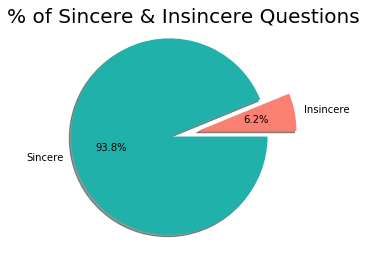

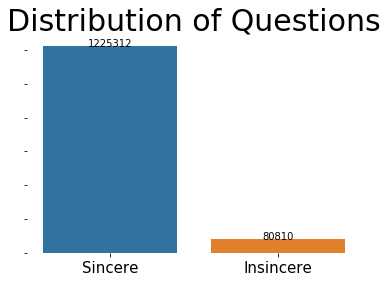

In [8]:
def quests_ratio(sizes):
    # Pie-chart for sincere/insincere questions
    labels = 'Insincere', 'Sincere'
    explode = (0.3, 0)
    plt.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow=True, colors = ['salmon', 'lightseagreen'])
    plt.axis('equal')
    plt.title('% of Sincere & Insincere Questions', fontsize = 20)
    plt.show()
quests_ratio(sizes = [num_insincere, num_sincere])

# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(original_train['target'])
g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Questions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

# Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. With just **6.6%** of our dataset belonging to the target class, we can definitely have an imbalanced class!

This is a problem because many machine learning models are designed to maximize overall accuracy, which especially with imbalanced classes may not be the best metric to use. Classification accuracy is defined as the number of correct predictions divided by total predictions times 100. For example, if we simply predicted that all questions are sincere, we would get a classification acuracy score of 93%!

This competition uses the F1 score which balances precision and recall.

Precision is the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
Recall is the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.

In [9]:
#example questions
print("Sincere Questions:")
print("__________________")
for row in np.asarray(original_train[original_train["target"] == 0]['question_text'])[0:5]:
    print(" "*3,row,)
print("\n","Insincere Questions:")
print("__________________")
for row in np.asarray(original_train[original_train["target"] == 1]['question_text'])[0:5]:
    print(" "*3,row)

Sincere Questions:
__________________
    How did Quebec nationalists see their province as a nation in the 1960s?
    Do you have an adopted dog, how would you encourage people to adopt and not shop?
    Why does velocity affect time? Does velocity affect space geometry?
    How did Otto von Guericke used the Magdeburg hemispheres?
    Can I convert montra helicon D to a mountain bike by just changing the tyres?

 Insincere Questions:
__________________
    Has the United States become the largest dictatorship in the world?
    Which babies are more sweeter to their parents? Dark skin babies or light skin babies?
    If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?
    I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?
    Which races have the smallest penis?


In [10]:
print("row 30 : " ,original_train[original_train['target'] == 1]['question_text'][30]) # definitively insincere
print("row 110 : " ,original_train[original_train['target'] == 1]['question_text'][110])
print("row 114" ,original_train[original_train['target'] == 1]['question_text'][114])
print("row 115" ,original_train[original_train['target'] == 1]['question_text'][115])
print("row 1306093" ,original_train[original_train['target'] == 1]['question_text'][1306093])
print("row 1306099" ,original_train[original_train['target'] == 1]['question_text'][1306099])
print("row 1306094" ,original_train[original_train['target'] == 1]['question_text'][1306094])

row 30 :  Which babies are more sweeter to their parents? Dark skin babies or light skin babies?
row 110 :  If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?
row 114 I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?
row 115 Which races have the smallest penis?
row 1306093 How is it to have intimate relation with your cousin?
row 1306099 Do pakis smell of curry and shit?
row 1306094 Why is it when singers have lyrics about voices in their head, religious people say they hear god and anyone stating they are being targeted by voice to brain technology? Are they called delusional schizo?


# From above analysis of Insincere Questions, we can infer that : #

- **They have a non-neutral tone**
    - They have an exaggerated tone to underscore a point about a group of people
    - They are rhetorical and meant to imply a statement about a group of people
- **They are disparaging or inflammatory**
    - They suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
    - They make disparaging attacks/insults against a specific person or group of people
    - They are based on an outlandish premise about a group of people
    - They make disparages against a characteristic that is not fixable and not measurable
- **They aren't grounded in reality.**
- **They are based on false information, or contains absurd assumptions.**
- **They use sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers.**

In [11]:
split_train1 = list(map(lambda x : x.lower().split(), original_train[original_train['target'] == 1]['question_text']))
split_train0 = list(map(lambda x : x.lower().split(), original_train[original_train['target'] == 0]['question_text']))

In [12]:
# Function to find the most common words from the corpus 
def common_first_words(split_train,n):
    most_common_words = {} # most common first words of each sincere question
    for question in split_train:
        if question[0] in most_common_words:
            most_common_words[question[0]] += 1
        else:
            most_common_words[question[0]] = 1

    sorted_by_desc = sorted(most_common_words.items(), key=lambda kv: kv[1], reverse=True)
    topn = sorted_by_desc[0:n]
    return [topn[i][0] for i in range(n)],  [topn[i][1] for i in range(n)]

In [13]:
# Dynamic plotting of graph of n number of most common words
def plot_first_words(top_words, top_counts, q_type, c):
    plt.barh(top_words, top_counts, color = c)
    plt.title('Most Common First Words and Their Counts', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 13)
    plt.xlabel('# of Questions', fontsize = 13)
    plt.ylabel('First Word', fontsize = 14)
    if q_type == 'Sincere':
        tick_val = [100000, 200000, 300000, 400000]
        tick_lab = ['100k', '200k', '300k', '400k']
    else:
        tick_val = [10000, 20000, 30000, 40000]
        tick_lab = ['10k', '20k', '30k','40k']
    plt.xticks(tick_val,tick_lab)
    plt.legend([q_type + ' Questions'])
#    sns.set_style('darkgrid')
    plt.show()

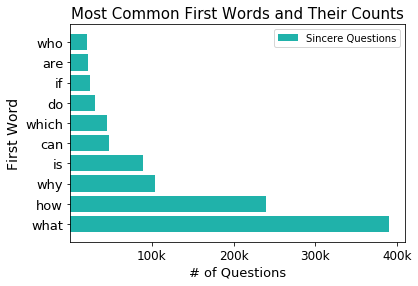

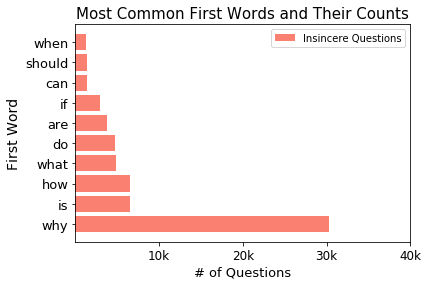

In [14]:
top_words0, top_counts0 = common_first_words(split_train0,10)
top_words1, top_counts1 = common_first_words(split_train1,10)
plot_first_words(top_words0, top_counts0, 'Sincere', 'lightseagreen')
plot_first_words(top_words1, top_counts1, 'Insincere', 'salmon')

In [15]:
def question_lengths_distribution(split_train, q_type, c):
    question_lengths = [len(question) for question in split_train]
    sns.set_style('darkgrid')
    fig1=sns.distplot(np.array(question_lengths), color = c)
    axes = fig1.axes
    axes.set_xlim(0,35)
    fig1.set_title('Distribution of Question Lengths', fontsize = 15)
    fig1.set_xlabel('# of Words in Quesion')
    fig1.set_ylabel('Desnity')
    fig1.legend([q_type + ' Question'])
    plt.show()

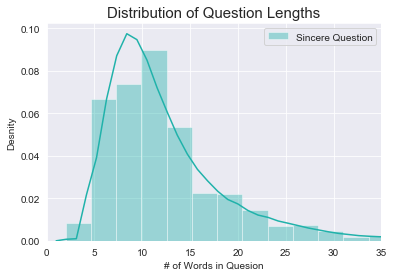

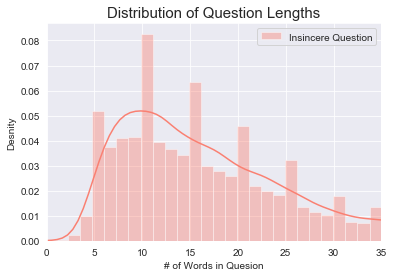

In [16]:
question_lengths_distribution(split_train0, 'Sincere', 'lightseagreen')
question_lengths_distribution(split_train1, 'Insincere', 'salmon')

Insincere questions seem to be longer on average and have a larger variance on their length. Sincere questions seem to clump up around the 9 word length while insincere have a less pronounced peek at around 10 words.

When an individual is hoping to assert an opinon, it generally takes more words to do this than asking a question. We noticed that among insincere questions, users were often attempting to state an opinon or make discriminatory remarks about a group. Perhaps, this is why we see the above observation.

In [17]:
def outlier_detection(data,type1,c):
    sentence_len = pd.Series([len(sentence) for sentence in data])
    print ('Longest Sincere Question is: ' , sentence_len.max() , ' words\n')
    sentence = ""
    max_index = sentence_len[sentence_len==sentence_len.max()].index.item()
    for word in data[max_index]:
        sentence = sentence + word + " " 
    print (sentence)
    desc = sentence_len.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    print("\n" ,desc)
    sns.set_style('darkgrid')
    sns.boxplot(y=sentence_len,whis=1.5,color = c)
    plt.title("Question Length Box PLot \n Outlier detection", fontsize = 16)
    plt.xlabel(type1,fontsize = 16)
    plt.show()

Longest Sincere Question is:  134  words

in "star trek 2013" why did they : *spoilers* *spoilers* *spoilers* *spoilers* 1)make warping look quite a bit like an hyperspace jump 2)what in the world were those bright particles as soon as they jumped. 3)why in the world did they make it possible for two entities to react in warp space in separate jumps. 4)why did spock get emotions for this movie. 5)what was the point of hiding the "enterprise" underwater. 6)when they were intercepted by the dark ship, how come they reached earth when they were far away from her.(i don't seem to remember the scene where they warp to earth). 7)how did the ship enter earth's atmosphere when it wasnt even in orbit. 8)when scotty opened the door of the black ship , how come pike and khan didn't slow down? 

 count    1225312
mean     12.5085
std      6.75069
min            2
25%            8
50%           11
75%           15
max          134
dtype: object


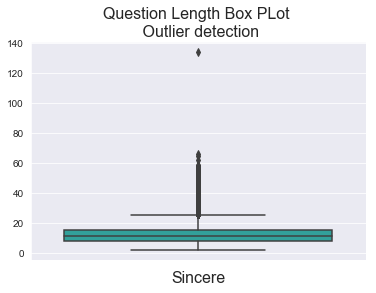

Longest Sincere Question is:  64  words

to you, does being a christian mean inviting in the spirit of jesus into you and suppressing our own spirit? 'thy will not mine' and all that? do you like living as a zombie of someone else's spirit - however perfect it may be? don't you want to experience and improve your own will and spirit and live your life as you, not jesus? 

 count      80810
mean     17.2778
std      9.56831
min            1
25%           10
50%           15
75%           23
max           64
dtype: object


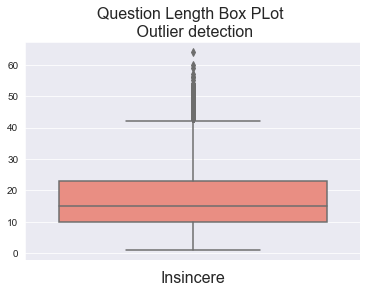

In [18]:
outlier_detection(split_train0,"Sincere", 'lightseagreen')
outlier_detection(split_train1,"Insincere",'salmon')

There is an outlier for question length in the Sincere Question group. This question is 134 words long and this user asked 7 questions in one post which resulted in the long length.

Outliers do not seem significant in insincere questions. The longest question length for this type is roughly half as long as the longest sincere question outlier.


In [19]:
concatenated_split_train1 = list(itertools.chain.from_iterable(split_train1))
concatenated_split_train0 = list(itertools.chain.from_iterable(split_train0))
s = list(map(lambda x: str(x), stopwords.words('english')))
concatenated_split_train1 = list(filter(lambda x : x not in s, concatenated_split_train1))  # filter out all stop words (e.g. pronouns, articles)
concatenated_split_train0 = list(filter(lambda x : x not in s, concatenated_split_train0))

In [20]:
def display_wordcloud(concatenated_split_train):
    unique_string=(" ").join(concatenated_split_train)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Sincere #
Best , One, India, Good, Think are really positive words and therefore are categorized as Sincere Questions

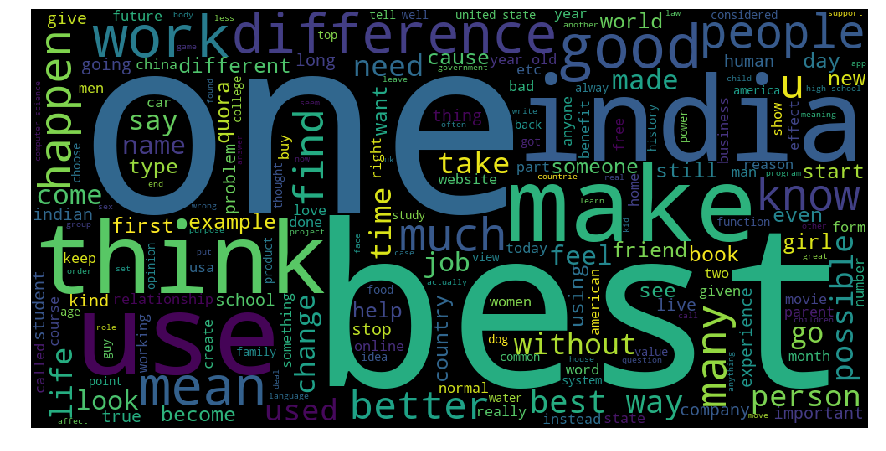

In [21]:
display_wordcloud(concatenated_split_train0)

# Insincere
People, Muslim, Trump , Women, girl, hate, sex, racist, gay, lie are the maljor constituents of the Insincere questions

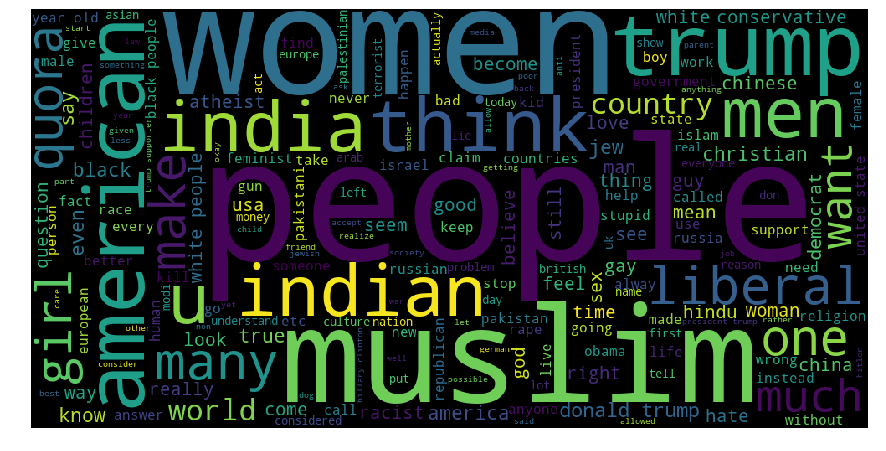

In [22]:
display_wordcloud(concatenated_split_train1)

In [23]:
def createFeatures(data):
    #Question Length
    data["quest_len"] = data.question_text.apply(lambda x: len(x.split()))
    
    #English Stopwords
    eng_stopwords = set(stopwords.words("english"))
    def nb_stop_words(question):
        words = re.sub(r"[,.;@#?!&$]+\ *", "", question).split(" ")
        return len([w for w in words if w in eng_stopwords])
    data['nb_stop_words'] = data.question_text.apply(nb_stop_words)
    
    #Number of character
    n_charac = pd.Series([len(t) for t in data.question_text])
    data['n_charac'] = n_charac
    
    #Numberof punctuation
    n_punctuation = pd.Series([sum([1 for x in text if x in set(string.punctuation)]) 
                               for text in data.question_text])
    data['n_punctuation'] = n_punctuation
    
    #Number of uppercase
    n_upper = pd.Series([sum([1 for c in text if c.isupper()]) for text in data.question_text])
    data['n_upper'] = n_upper
    
#    del eng_stopwords
#    gc.collect()
    return data

In [24]:
print("Creating features for train set")
start = time.time()
original_train = createFeatures(original_train)
end = time.time()
tle = (end- start) /60
print(f" This process takes {tle} minutes")
print("\nCreating features for test set")
start = time.time()
original_test = createFeatures(original_test)
end = time.time()
tle = (end- start) /60
print(f" This process takes {tle} minutes")

Creating features for train set
 This process takes 2.203529119491577 minutes

Creating features for test set
 This process takes 0.6356386502583822 minutes


In [25]:
original_train.head()

,qid,question_text,target,quest_len,nb_stop_words,n_charac,n_punctuation,n_upper
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,6,72,1,2
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,7,81,2,1
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,1,67,2,2
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,2,57,1,4
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,5,77,1,3


In [26]:
original_test.head()

,qid,question_text,quest_len,nb_stop_words,n_charac,n_punctuation,n_upper
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,10,101,1,1
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,12,162,2,16
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,5,50,1,1
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,1,22,1,1
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,0,48,1,1


Feature: Question Length
Training Data:
    Max: 134 , Min: 1
     Max for sincere target: 134 , Min for sincere target: 2
     Max for insincere target: 64 , Min for insincere target: 1

 Testing Data:
    Max: 87 , Min: 1
#---------------------------------------------------------#
Mean question length:
   Training data: 13.0
   Testing data: 13.0

 Mean question length:
   Sincere question 13.0
   Insincere question 17.0


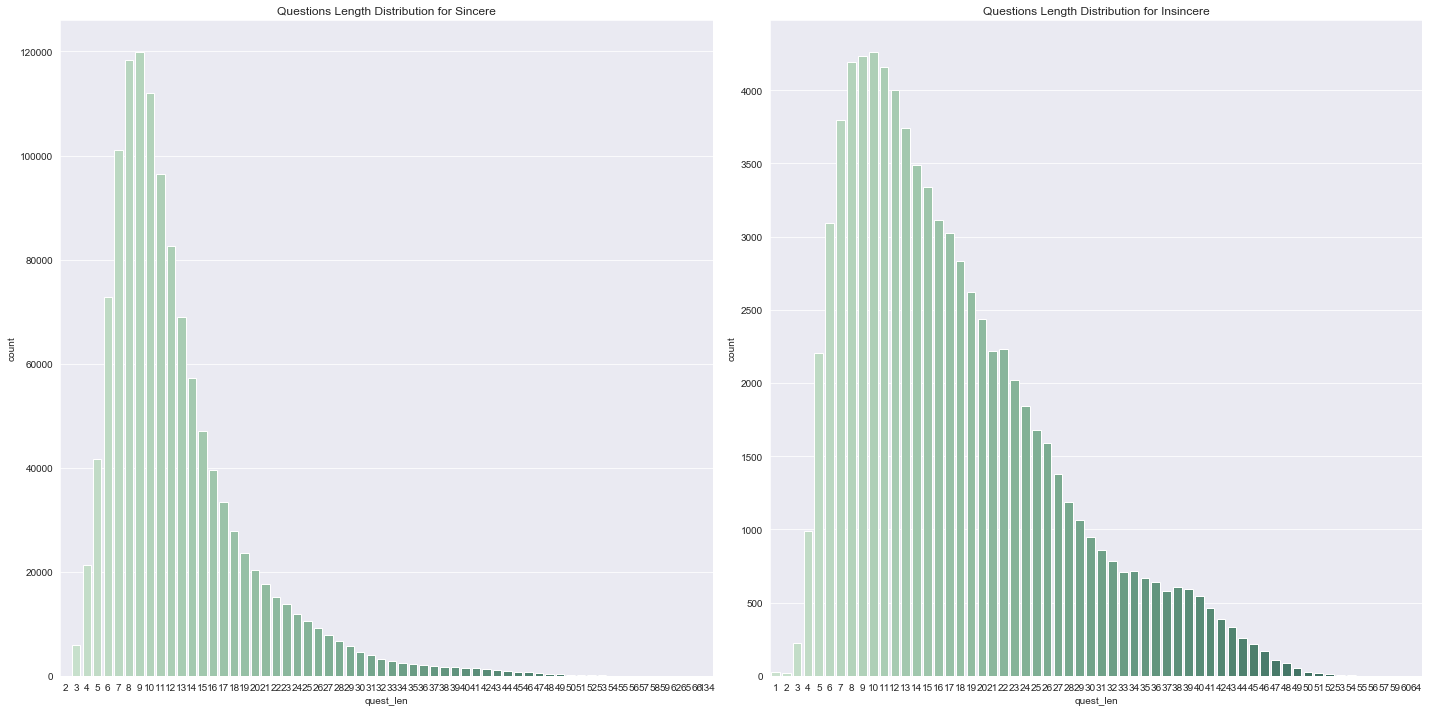

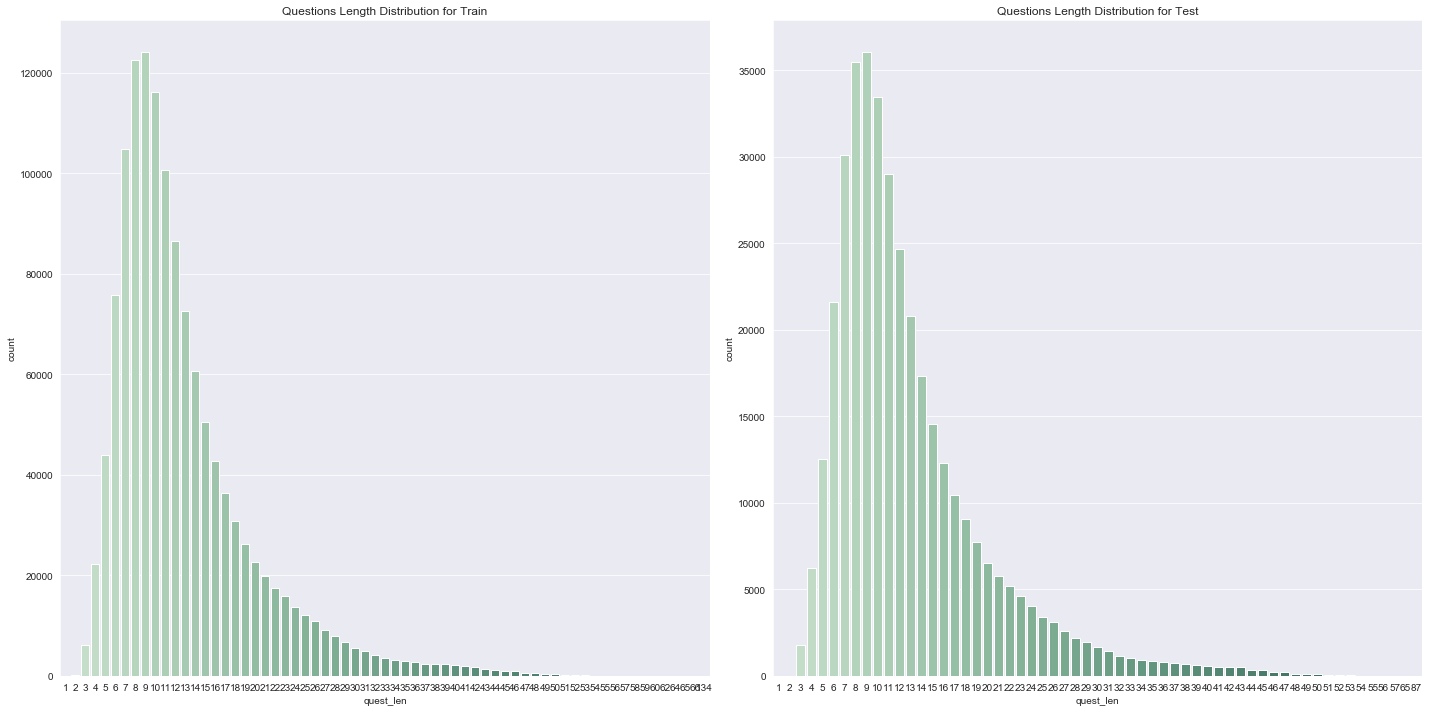

In [27]:
#question length
print("Feature: Question Length")
print("Training Data:")
print(" "*3,"Max:", max(original_train.quest_len),", Min:", min(original_train.quest_len))
print(" "*4,"Max for sincere target:",max(original_train[original_train.target == 0].quest_len),
           ", Min for sincere target:",min(original_train[original_train.target == 0].quest_len))
print(" "*4,"Max for insincere target:", max(original_train[original_train.target == 1].quest_len),
           ", Min for insincere target:",min(original_train[original_train.target == 1].quest_len))
print("\n Testing Data:")
print(" "*3,"Max:", max(original_test.quest_len), ", Min:", min(original_test.quest_len))
print("#---------------------------------------------------------#")
#---------------------------------------------------------#
print("Mean question length:")
print("   Training data:", np.round(np.mean(original_train.quest_len)))
print("   Testing data:", np.round(np.mean(original_test.quest_len)))
print("\n Mean question length:")
print("   Sincere question", np.round(np.mean(np.asarray(original_train[original_train.target == 0].quest_len))))
print("   Insincere question", np.round(np.mean(np.asarray(original_train[original_train.target == 1].quest_len))))
#---------------------------------------------------------#
#Distribution of question length color coded by Question type
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.set_style('darkgrid')
sns.countplot(original_train[original_train.target == 0].quest_len,ax=ax[0],palette="ch:2.5,-.2,dark=.3").set_title("Questions Length Distribution for Sincere")
sns.countplot(original_train[original_train.target == 1].quest_len,ax=ax[1],palette="ch:2.5,-.2,dark=.3").set_title("Questions Length Distribution for Insincere")
plt.tight_layout()
plt.show()
#---------------------------------------------------------#
fig, ax =plt.subplots(1,2,figsize=(20,10))
sns.set_style('darkgrid')
sns.countplot(original_train.quest_len,ax=ax[0],palette="ch:2.5,-.2,dark=.3").set_title("Questions Length Distribution for Train")
sns.countplot(original_test.quest_len,ax=ax[1],palette="ch:2.5,-.2,dark=.3").set_title("Questions Length Distribution for Test")
plt.tight_layout()
plt.show() 

Feature: Number of stopwords
Examples of questions without stopwords:
    Is swallowing Listerine dangerous?
    Can Chronicled replace supply Chain?
    Do intelligent people ask questions?
    I almost constantly feel uneasy. Why?
    Are Jat and Gujjar girls beautiful?
#----------------------------------------------------------#
Mean # of stopwords in training data: 5.0
Mean # of stopwords in testing data: 5.0
#----------------------------------------------------------#
Number of stopwords per sentence
 Training Data:
  Max # in train: 55 ; Min # in train: 0
   Sincere target:  Max: 55 ; Min: 0
   Insincere target:  Max: 33 ; Min: 0
 
 Testing Data:
Max # in test: 45 ; Min # in test: 0


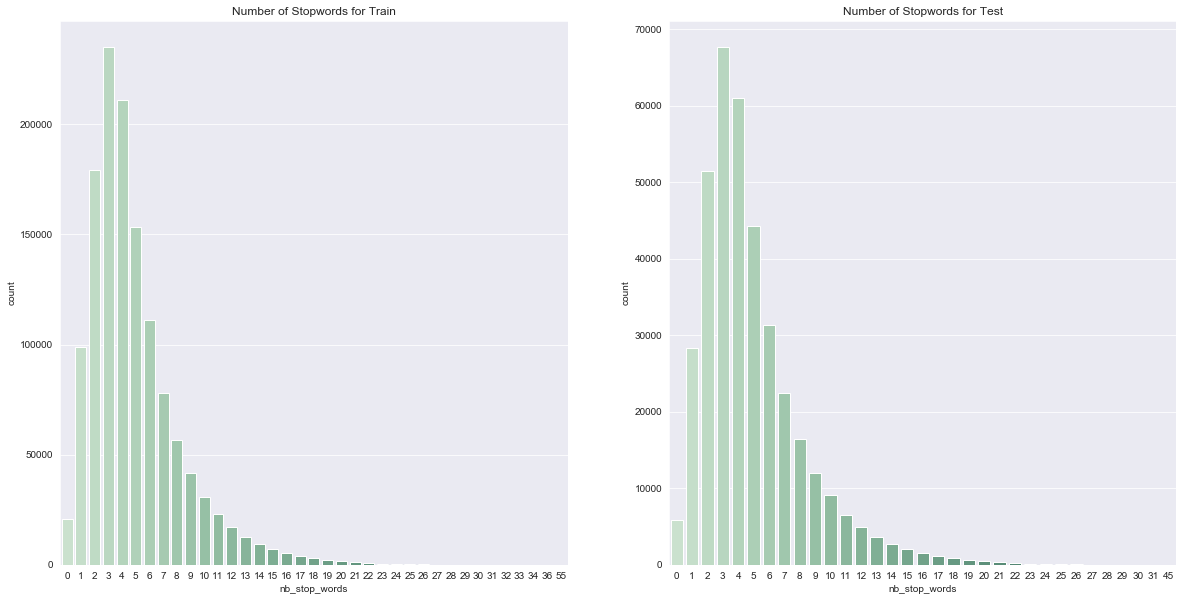

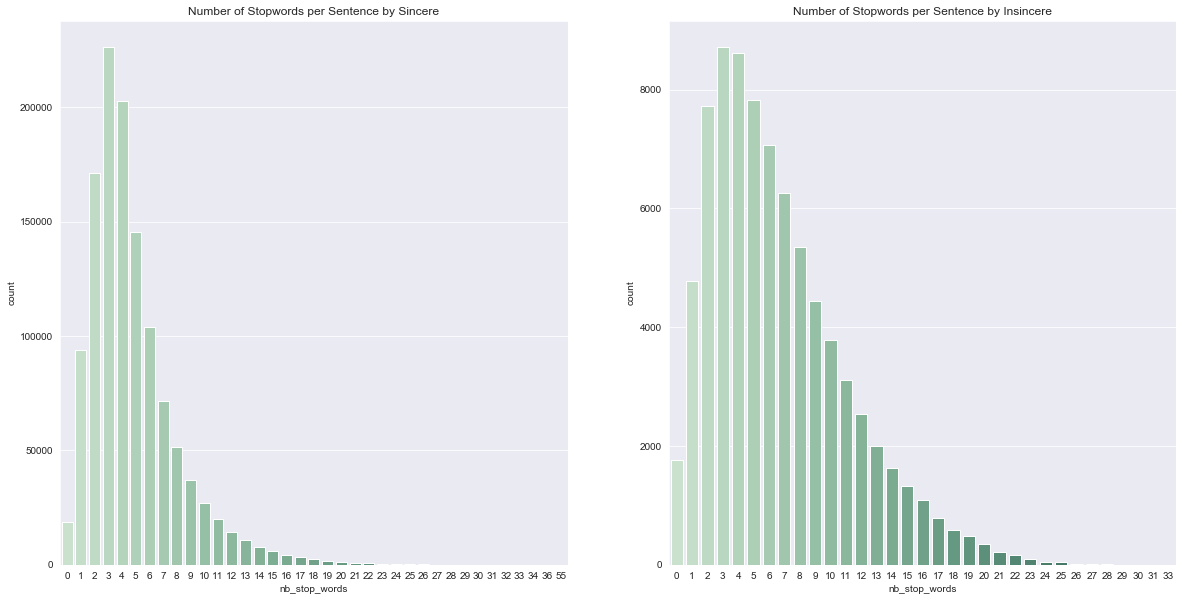

In [28]:
#stopwords
print("Feature: Number of stopwords")
#Out of curiosity. questions without stopwords
print("Examples of questions without stopwords:")
for row in original_train[original_train.nb_stop_words==0].question_text[0:5]:
    print(" "*3, row)
#----------------------------------------------------------------#
print("#----------------------------------------------------------#")
print("Mean # of stopwords in training data:", np.round(np.mean(original_train.nb_stop_words)))
print("Mean # of stopwords in testing data:", np.round(np.mean(original_test.nb_stop_words)))
print("#----------------------------------------------------------#")
print("Number of stopwords per sentence")
print(" Training Data:")
print("  Max # in train:" ,max(original_train.nb_stop_words),"; Min # in train:" ,min(original_train.nb_stop_words))
print("   Sincere target: ", "Max:", max(original_train[original_train.target == 0].nb_stop_words),
      "; Min:", min(original_train[original_train.target == 0].nb_stop_words))
print("   Insincere target: ", "Max:", max(original_train[original_train.target == 1].nb_stop_words),
      "; Min:", min(original_train[original_train.target == 1].nb_stop_words))      
print(" \n Testing Data:")
print("Max # in test:", max(original_test.nb_stop_words),"; Min # in test:", min(original_test.nb_stop_words))
#----------------------------------------------------------------#
fig, ax =plt.subplots(1,2,figsize=(20, 10))
sns.set_style('darkgrid')
sns.countplot(original_train.nb_stop_words,ax=ax[0],palette="ch:2.5,-.2,dark=.3").set_title("Number of Stopwords for Train")
sns.countplot(original_test.nb_stop_words,ax=ax[1],palette="ch:2.5,-.2,dark=.3").set_title("Number of Stopwords for Test")
#----------------------------------------------------------------#
fig, ax =plt.subplots(1,2,figsize=(20, 10))
sns.countplot(original_train[original_train.target == 0].nb_stop_words,ax=ax[0],palette="ch:2.5,-.2,dark=.3").set_title("Number of Stopwords per Sentence by Sincere")
sns.countplot(original_train[original_train.target == 1].nb_stop_words,ax=ax[1],palette="ch:2.5,-.2,dark=.3").set_title("Number of Stopwords per Sentence by Insincere")
plt.show()

Top 25 common amd rare words


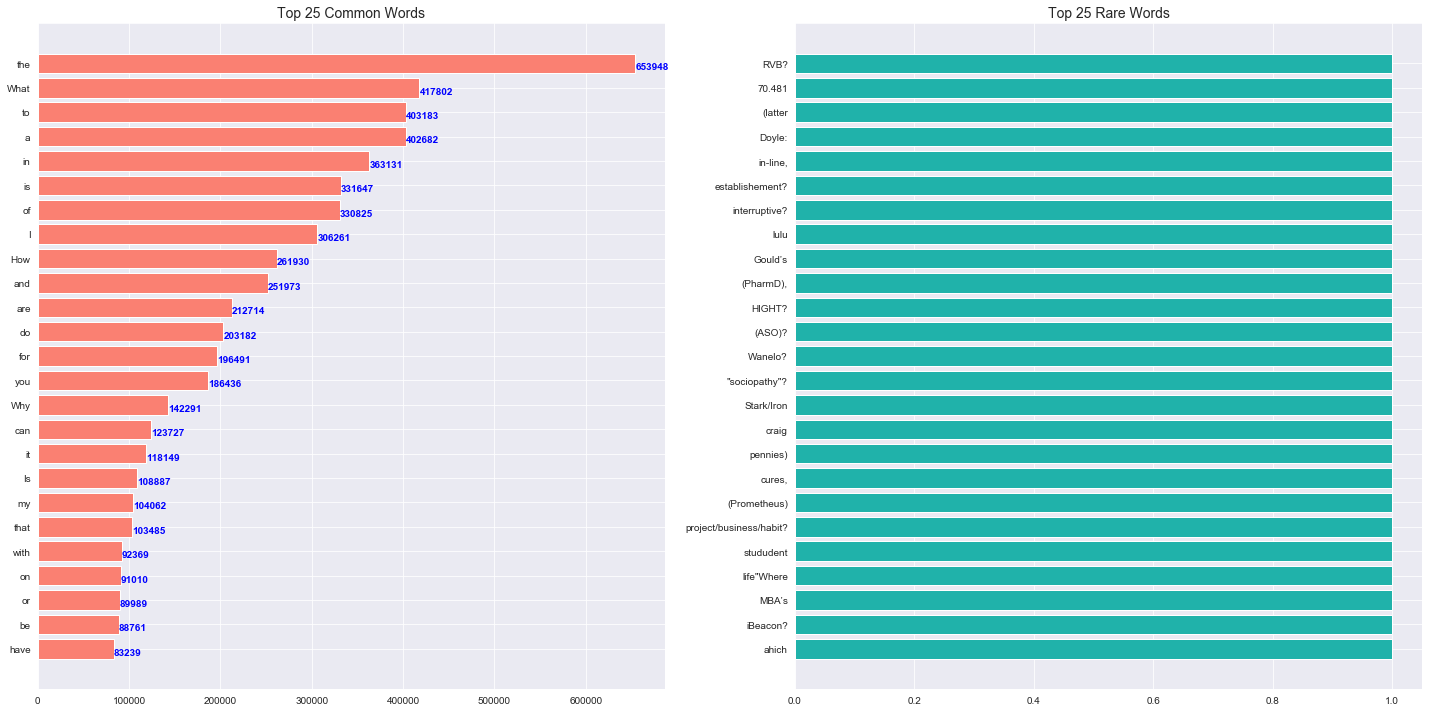

In [29]:
print("Top 25 common amd rare words")
comm_word = pd.Series(' '.join(original_train.question_text).split()).value_counts()[:25]
comm_word = pd.DataFrame({'word':comm_word.index, 'frequency':comm_word.values})
rare_word = pd.Series(' '.join(original_train.question_text).split()).value_counts()[-25:]
rare_word = pd.DataFrame({'word':rare_word.index, 'frequency':rare_word.values})
fig, ax =plt.subplots(1,2,figsize=(20, 10))
sns.set_style('darkgrid')
plt.gca().invert_yaxis()
ax[0].set_title("Top 25 Common Words", fontsize = 14)
ax[0].barh(comm_word.word,comm_word.frequency,color='salmon')
ax[0].invert_yaxis()
for i, v in enumerate(comm_word.frequency):
    ax[0].text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
#
ax[1].set_title("Top 25 Rare Words",fontsize = 14)
ax[1].barh(rare_word.word,rare_word.frequency,color='lightseagreen')
plt.tight_layout()
plt.show()

The above plot shows that the before we can access common and rare words we need to clean the data first, most importantly remove puntuation.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
targ0_data = original_train[original_train.target == 0].question_text
targ1_data = original_train[original_train.target == 1].question_text

# create the object of tfid vectorizer for each class
Sin_cv_vectorizer = CountVectorizer().fit(targ0_data) 
print('Vocabulary len of Sincere:', len(Sin_cv_vectorizer.get_feature_names()))
print('Shortest word in Sincere:', min(Sin_cv_vectorizer.vocabulary_, key=len))
print('Longest word in Sincere:', max(Sin_cv_vectorizer.vocabulary_, key=len))

InSin_cv_vectorizer = CountVectorizer().fit(targ1_data)
print('\nVocabulary len of Insincere:', len(InSin_cv_vectorizer.get_feature_names()))
print('Shortest word in InSincere:', min(InSin_cv_vectorizer.vocabulary_, key=len))
print('Longest word in Insincere:', max(InSin_cv_vectorizer.vocabulary_, key=len))

Vocabulary len of Sincere: 189005
Shortest word in Sincere: as
Longest word in Sincere: 84303978245329874519123841798151507540237416095743623894460139273409764703461248098443834290438321894387129481361209843093126438096023498434960434297814423790438809481927423097438412377777409324590447848903148903219487309487320194

Vocabulary len of Insincere: 37784
Shortest word in InSincere: in
Longest word in Insincere: zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


In [31]:
print("Feature: TFIDF Words")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# create the object of tfid vectorizer
Sin_tfid_vectorizer = TfidfVectorizer("english").fit(targ0_data)
InSin_tfid_vectorizer = TfidfVectorizer("english").fit(targ1_data)

# collect the vocabulary items used in the vectorizer
Sin_dictionary = Sin_tfid_vectorizer.vocabulary_.items()
InSin_dictionary = InSin_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
Sinvocab = []
Sincount = []
    # iterate through each vocab and count append the value to designated lists
for Sinkey, Sinvalue in Sin_dictionary:
    Sinvocab.append(Sinkey)
    Sincount.append(Sinvalue)
    
# lists to store the vocab and counts
InSinvocab = []
InSincount = []
    # iterate through each vocab and count append the value to designated lists
for InSinkey, InSinvalue in InSin_dictionary:
    InSinvocab.append(InSinkey)
    InSincount.append(InSinvalue)

# store the count in panadas dataframe with vocab as index
Sin_vocab = pd.Series(Sincount, index=Sinvocab).sort_values(ascending=False)
InSin_vocab = pd.Series(InSincount, index=InSinvocab).sort_values(ascending=False)

Feature: TFIDF Words


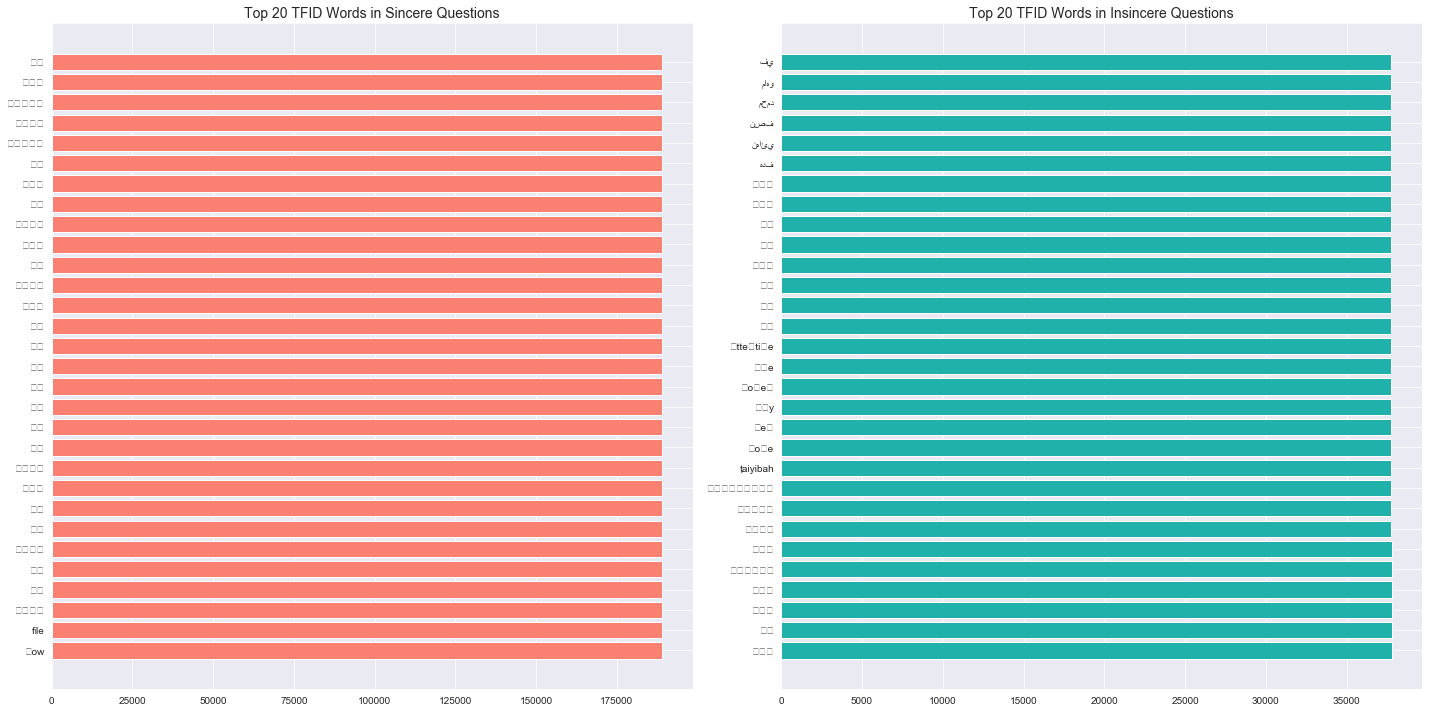

In [32]:
Sintop_vacab = Sin_vocab.head(30)
Sintop_vacab = pd.DataFrame({'word':Sintop_vacab.index, 'frequency':Sintop_vacab.values})
InSintop_vacab = InSin_vocab.head(30)
InSintop_vacab = pd.DataFrame({'word':InSintop_vacab.index, 'frequency':InSintop_vacab.values})
# plots of the top vocab
fig, ax =plt.subplots(1,2,figsize=(20, 10))
ax[0].set_title("Top 20 TFID Words in Sincere Questions", fontsize = 14,)
ax[0].barh(Sintop_vacab.word,Sintop_vacab.frequency,color='Salmon')
ax[1].set_title("Top 20 TFID Words in Insincere Questions",fontsize = 14)
ax[1].barh(InSintop_vacab.word,InSintop_vacab.frequency,color='lightseagreen')
plt.tight_layout()
plt.show()

In [33]:
print(f"Length of Sincere TFID vocab: {len(Sin_vocab)}")
print(Sin_vocab.head(40))

Length of Sincere TFID vocab: 189005
ｈow      189004
ﬁle      189003
행복하게     189002
했다       189001
한다       189000
한국어를     188999
한국       188998
하다       188997
하기를      188996
포경수술     188995
청하       188994
천사       188993
짱깨       188992
저의       188991
저는       188990
있네       188989
있고       188988
입니다      188987
이정도쯤     188986
이와       188985
이름은      188984
이런것도     188983
요즘       188982
열여섯      188981
없어       188980
안녕하세요    188979
싱관없어     188978
수업하니까    188977
선배님      188976
선배       188975
서로를      188974
서로가      188973
사랑해      188972
뽀비엠퍼러    188971
북한       188970
보니       188969
배웠어요     188968
배우고      188967
민국       188966
몇시간      188965
dtype: int64


In [34]:
print(f"Length of Sincere TFID vocab: {len(InSin_vocab)}")
print(InSin_vocab.head(75))

Length of Sincere TFID vocab: 37784
韓国人                                                                                                                                                                      37783
素质                                                                                                                                                                       37782
管中閔                                                                                                                                                                      37781
福哒柄                                                                                                                                                                      37780
海南人の日本                                                                                                                                                                   37779
操你妈                                                                                      

This contains weird fonts and other languages: 
(translations made using Google translate 
- 韓国人 => Japanese: Korean person
- 素质 => Chinese: Quality
- 管中閔 Chinese: In the tube
- 福哒柄 Chinese: good fortune
- 海南人の日本 Japenese: Hainan people's Japan
- 操你妈 Chinese: F*** your mother
- 安倍晋三 Japenese; Shinzo Abe (PM of Japan)
- 在日朝鮮人 Chinese: Koreans in Japan
- 不正常人類研究中心 Chinese: Abnormal human research center
- ṭaiyibah => Hindi/Islamic : purity

- ᗰoᖇe => English : more #zigjaw/1 font ?

- ᗰeᑎ => English men
- ᗯᕼy => English why
- ᗯoᗰeᑎ => English women
- ᗩᖇe => English are
- ᗩtteᑎtiᐯe English attentive
- ਜਬ => Punjabi: when
- रत => Punjabi: the
- पन => Punjabi: water
- चमत => Punjabi: Excitement

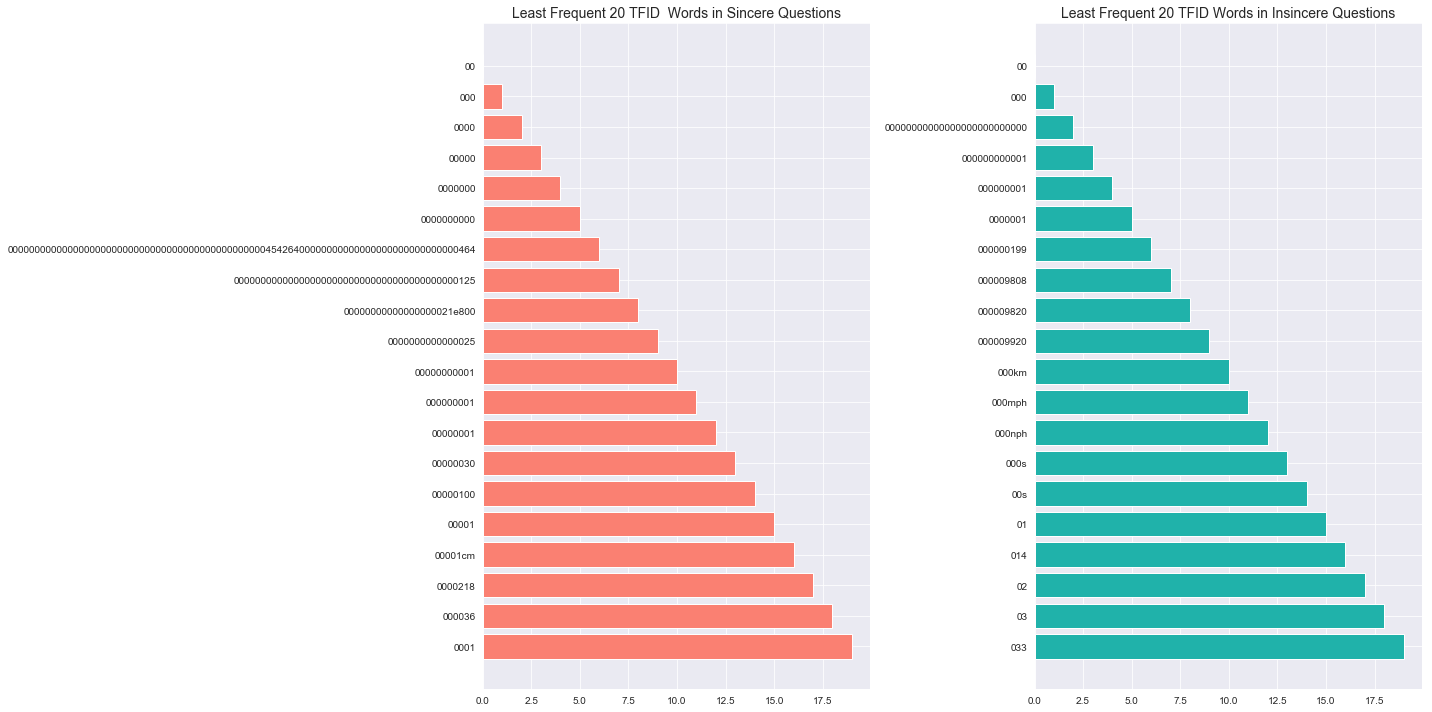

In [35]:
# plot of the least frequent vocab
Sinlow_vacab = Sin_vocab.tail(20)
Sinlow_vacab = pd.DataFrame({'word':Sinlow_vacab.index, 'frequency':Sinlow_vacab.values})
InSinlow_vacab = InSin_vocab.tail(20)
InSinlow_vacab = pd.DataFrame({'word':InSinlow_vacab.index, 'frequency':InSinlow_vacab.values})
# plots of the top vocab
fig, ax =plt.subplots(1,2,figsize=(20, 10))
ax[0].set_title("Least Frequent 20 TFID  Words in Sincere Questions", fontsize = 14)
ax[0].barh(Sinlow_vacab.word,Sinlow_vacab.frequency,color='salmon')
ax[1].set_title("Least Frequent 20 TFID Words in Insincere Questions",fontsize = 14)
ax[1].barh(InSinlow_vacab.word,InSinlow_vacab.frequency,color='lightseagreen')
plt.tight_layout()
plt.show()

This plot shows that these questions contain non-English words and numbers .

# Bigram/Trigram Plots

The plots for top bigrams/trigrams in insincere questions can help us determine what kind of questions Quora would like to limit or ban. People are always finding creative new ways to ask insincere questions, and it is important for Quora to be aware of any new forms of insincere questions so as to make changes to its policies and guidelines if need be. The top bigram/trigram plots are one way to group insincere questions in a more intelligible format by pinpointing frequent topics of insincere questions.

There are many potential uses for such findings including this non-exhaustive list:

- They can be examined repeatedly to regularly refine Quora's definition of an insincere question.

- They can give insight into the level of racism, sexism, and other discrimantory thoughts that are prevalent in the world. Note that although the group of users on Quora is a sample of the popultaion of the world, the approximation for population parameters is not necessarily wholistic since the set of all Quora questions is a nonrandom sample. Nonetheless, if our goal is to limit all forms of existing discriminatory thoughts, then using Quora for such an agenda is a step in our intended direction.

- Given that questions on Quora can be written anonymously, a grouping of the most frequent topics in anonymously proposed insincere questions can illustrate what some of our deepest and/or darkest thoughts are. This demonstrates that anonymity is a key factor to confession since we are often hestitant towards admitting dishonorable thoughts.

In [36]:
# Bigrams for insincere questions    
bigram_ins = nltk.bigrams(concatenated_split_train1)
fdist_ins = nltk.FreqDist(bigram_ins)

# Bigrams for sincere questions    
bigram_sin = nltk.bigrams(concatenated_split_train0)
fdist_sin = nltk.FreqDist(bigram_sin)

# Trigrams for insincere questions
trigram_ins = nltk.ngrams(concatenated_split_train1, 3)
fdist2_ins = nltk.FreqDist(trigram_ins)

# Trigrams for sincere questions
trigram_sin = nltk.ngrams(concatenated_split_train0, 3)
fdist2_sin = nltk.FreqDist(trigram_sin)

In [37]:
def plot_n_grams(f, q_type, ngram, val, col):
    f = {key:value for key, value in f.items() if value >= val }
    top_ngm = pd.Series(f)
    top_ngm = top_ngm.sort_values()
    plt.figure(figsize=(10, 10))
    plt.title("Top 40 " + ngram + "s for " + q_type + " Questions", fontsize = 20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=15)
    plt.ylabel(ngram, fontsize = 17)
    plt.xlabel('Count', fontsize = 17)
    top_ngm.plot(kind = 'barh', color = col)
    plt.show()

**Donald Trump, Black people, white people,Indian Muslims are among the most targetted people for insincere comments**

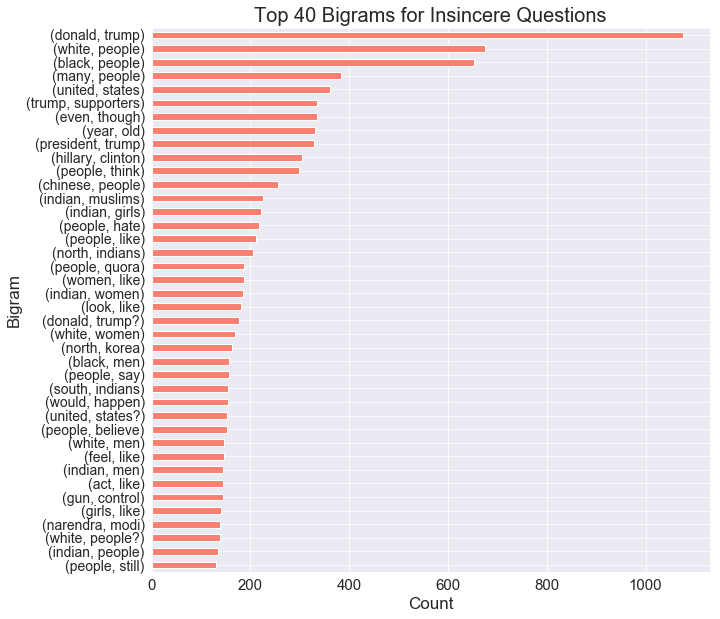

In [38]:
plot_n_grams(fdist_ins, 'Insincere', 'Bigram', 130, 'Salmon')

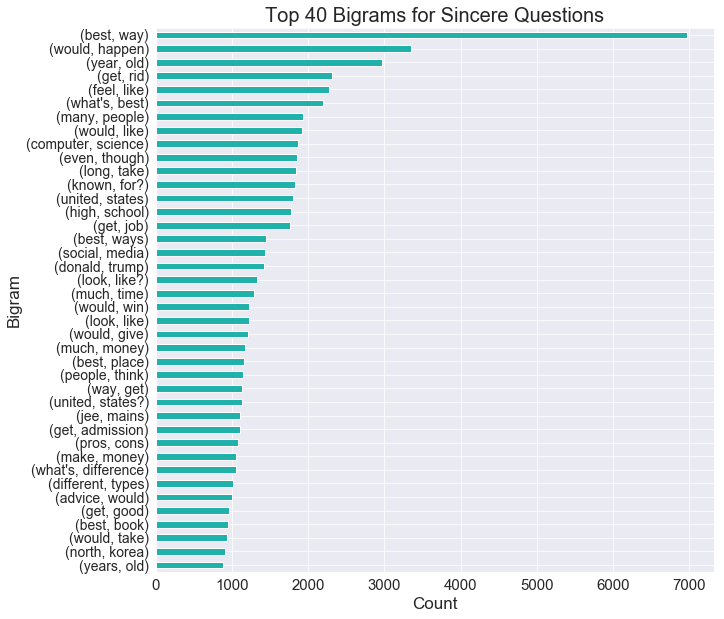

In [39]:
plot_n_grams(fdist_sin, 'Sincere', 'Bigram', 888, 'lightseagreen')

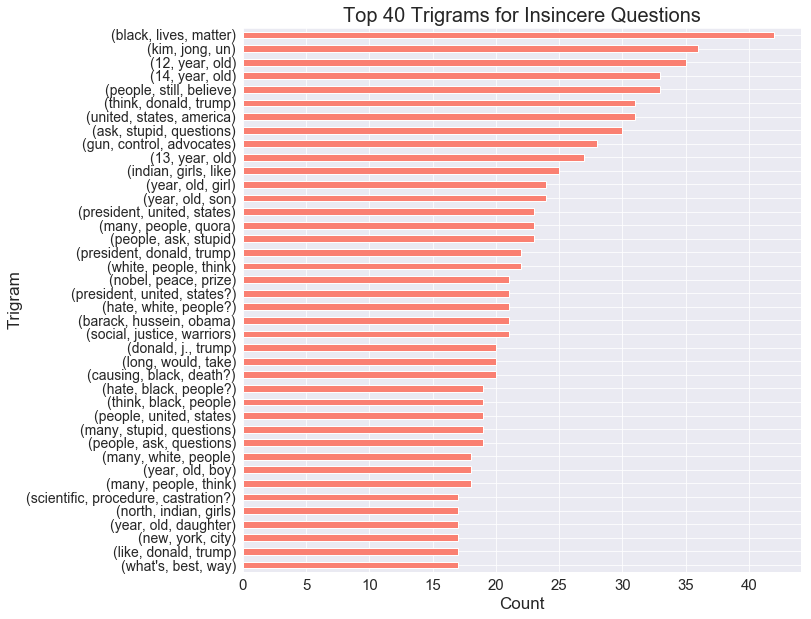

In [40]:
plot_n_grams(fdist2_ins, 'Insincere', 'Trigram', 17, 'Salmon')

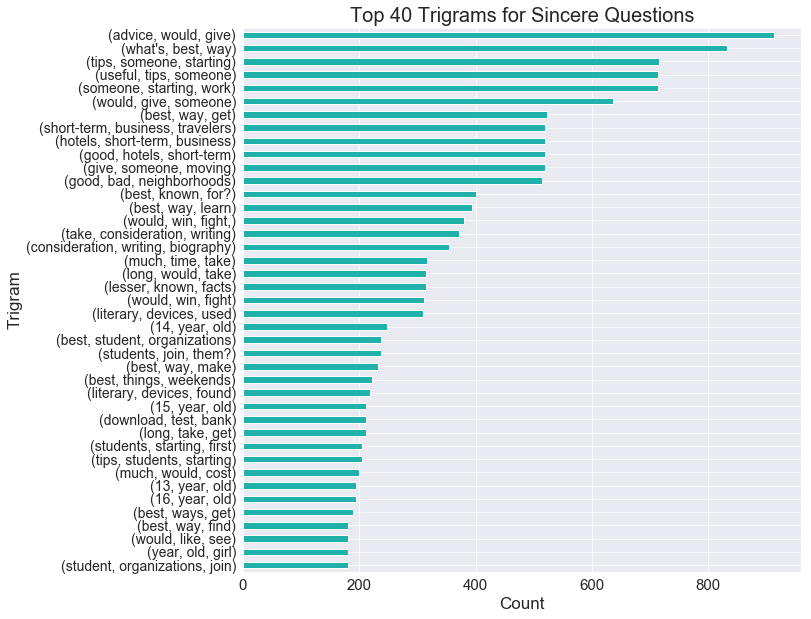

In [41]:
plot_n_grams(fdist2_sin, 'Sincere', 'Trigram', 180, 'lightseagreen')

**Results from Data Exploration:**

- No missing questions.
- Questions do contain contractions, need to clean.
- Insincere questions are shorter in question length than sincere question.
- Should stopwords be removed: Note that the pre trained stopword dictionary is not the best. Removing stopwords may not be the best approach.
- The majority of the questions in both data sets are  $\approx 10-15$ words long (i.e. excluding punctuation).
- Insincere questions are shorter than sincere questions on average.
- The target is imbalanced so we will have to deal with this.

# Text Pre Processing 

In [42]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import copy
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
import gc #garbage collector
import time
from gensim.utils import lemmatize
from pattern.en import parse

#------------------------------------------------------------------------#
import re #regular expression/pattern matching
import random
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#------------------------------------------------------------------------#

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aksof\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
train_df = pd.read_csv("train.csv", encoding='utf8')
test_df = pd.read_csv("test.csv", encoding='utf8')
all_test_texts = ''.join(test_df.question_text.values.tolist())

print('Train:', train_df.shape)
print('Test:', test_df.shape)

Train: (1306122, 3)
Test: (375806, 2)


Data preprocessing consists of a number of steps, any number of which may or not apply to a given task, but generally fall under the broad categories of 

- **Tokenization** :
Tokenization is a step which splits longer strings of text into smaller pieces, or tokens. Larger chunks of text can be tokenized into sentences, sentences can be tokenized into words, etc. Further processing is generally performed after a piece of text has been appropriately tokenized. Tokenization is also referred to as text segmentation or lexical analysis. Sometimes segmentation is used to refer to the breakdown of a large chunk of text into pieces larger than words (e.g. paragraphs or sentences), while tokenization is reserved for the breakdown process which results exclusively in words.

- **normalization** :
Before further processing, text needs to be normalized. Normalization generally refers to a series of related tasks meant to put all text on a level playing field: converting all text to the same case (upper or lower), removing punctuation, converting numbers to their word equivalents, and so on. Normalization puts all words on equal footing, and allows processing to proceed uniformly.


- 
    - Replace contractions :  replace all contractions with the full meaning. (Contractions scrapped from Wikipedia:          https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions)
    - Stemming/Lemmatization
    - Lowering Case
    - Remove Numbers
    - Remove Punctuation
    - Replace spelling errors: replace misspelled words with the correct spelling. (Common misspellings scrapped from oxford dictionaries: https://en.oxforddictionaries.com/spelling/common-misspellings)
    - Strip white space
    - Remove Stop Words
    - Remove 25 commonly occuring words and 25 most rare words from corpus

   
- **Noise Removal**

# Preprocessing: Tokenization
Tokenization is the process of converting text into tokens. For example, a document into paragraphs, then sentences and words. In this case we are tokenising into words. Once we have done this it can be easier to do further preprocessing like filtering out unesseary tokens which may cause noise.

In [44]:
tokens = word_tokenize(train_df.question_text[17])
print(tokens)
train_df.question_text[17]

['Have', 'you', 'licked', 'the', 'skin', 'of', 'a', 'corpse', '?']


'Have you licked the skin of a corpse?'

In [45]:
ContDict = {"ain't": 'am not ', "amn't": 'am not', "aren't": 'are not', "can't": 'cannot', "'cause": 'because', "could've": 'could have', 
            "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not ', "daresn't": 'dare not', "dasn't": 'dare not',
            "didn't": 'did not', "doesn't": 'does not', "don't": 'do not ', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to',
            'gimme': 'give me', 'gonna': 'going to', "gon't": 'go not', 'gotta': 'got to', "hadn't": 'had not', "hasn't": 'has not', 
            "haven't": 'have not', "he'd": 'he had ', "he'll": 'he shall ', "he's": 'he has ', "he've": 'he have', "how'd": 'how did ',
            "how'll": 'how will', "how're": 'how are', "how's": 'how has ', "I'd": 'I had ', "I'll": 'I shall ', "I'm": 'I am', 
            "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "isn't": 'is not', "it'd": 'it would', "it'll": 'it shall ',
            "it's": 'it has ', "let's": 'let us', "mayn't": 'may not', "may've": 'may have', "mightn't": 'might not', "might've": 'might have',
            "mustn't": 'must not', "mustn't've": 'must not have', "must've": 'must have', "needn't": 'need not', "ne'er": 'never',
            "o'clock": 'of the clock', "o'er": 'over', "ol'": 'old', "oughtn't": 'ought not', "'s": 'is, has, does, or us',
            "shalln't": 'shall not', "shan't": 'shall not', "she'd": 'she had ', "she'll": 'she shall ', "she's": 'she has ',
            "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "somebody's": 'somebody has ',
            "someone's": 'someone has ', "something's": 'something has ', "that'll": 'that shall ', "that're": 'that are',
            "that's": 'that has ', "that'd": 'that would ', "there'd": 'there had ', "there'll": 'there shall ', "there're": 'there are', 
            "there's": 'there has ', "these're": 'these are', "they'd": 'they had ', "they'll": 'they shall ', "they're": 'they are ', 
            "they've": 'they have', "this's": 'this has ', "those're": 'those are', "'tis": 'it is', "'twas": 'it was', "wasn't": 'was not',
            "we'd": 'we had ', "we'd've": 'we would have', "we'll": 'we will', "we're": 'we are', "we've": 'we have', "weren't": 'were not',
            "what'd": 'what did', "what'll": 'what shall ', "what're": 'what are', "what's": 'what has ', "what've": 'what have', "when's": 'when has ',
            "where'd": 'where did', "where're": 'where are', "where's": 'where has ', "where've": 'where have', "which's": 'which has ',
            "who'd": 'who would ', "who'd've": 'who would have', "who'll": 'who shall ', "who're": 'who are', "who's": 'who has ', "who've": 'who have', 
            "why'd": 'why did', "why're": 'why are', "why's": 'why has ', "won't": 'will not', "would've": 'would have', "wouldn't": 'would not',
            "y'all": 'you all', "you'd": 'you had ', "you'll": 'you shall ', "you're": 'you are', "you've": 'you have', "noun's": 'noun is'}

PunctDict = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", 
             "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', 
             '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi',"—": "-", "–": "-", "_": "-", '”': '"', "″": '"', '“': '"', '•': '.', '−': '-',
             "’": "'", "‘": "'", "´": "'", "`": "'", '\u200b': ' ', '\xa0': ' ','،':'','„':'','…': ' ... ', '\ufeff': '' }

Com_MisspellDict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 
                    'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor',
                    'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 
                    'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'whta': 'what',
                    'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 
                    'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many',
                    'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                    'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating',
                    'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', 
                    '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                    'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization',
                    'demonitization': 'demonetization', 'demonetisation': 'demonetization', 'pokémon': 'pokemon'}
punc_list = ['\\', '?', '.', ';', ',', '-']


Oxfd_MisspellDict = {'accomodate': 'accommodate','accomodation': 'accommodation', 'acheive': 'achieve', 'accross': 'across',
                     'agressive': 'aggressive','agression': 'aggression','apparantly': 'apparently','appearence': 'appearance',
                     'arguement': 'argument','assasination': 'assassination','basicly': 'basically','begining': 'beginning',
                     'belive': 'believe','bizzare': 'bizarre','buisness': 'business','calender': 'calendar',
                     'cemetary': 'cemetery','chauffer': 'chauffeur','collegue': 'colleague','comming': 'coming','commitee': 'committee',
                     'completly': 'completely','concious': 'conscious','curiousity': 'curiosity','definately': 'definitely',
                     'dilemna': 'dilemma','dissapear': 'disappear','dissapoint': 'disappoint','ecstacy': 'ecstasy','embarass': 'embarrass',
                     'enviroment': 'environment','existance': 'existence','Farenheit': 'Fahrenheit','familar': 'familiar','finaly': 'finally',
                     'florescent': 'fluorescent','foriegn': 'foreign','forseeable': 'foreseeable','fourty': 'forty','foward': 'forward',
                     'freind': 'friend','futher': 'further','jist': 'gist','glamourous': 'glamorous','goverment': 'government',
                     'gaurd': 'guard','happend': 'happened','harrass': 'harass','harrassment': 'harassment','honourary': 'honorary',
                     'humourous': 'humorous','idiosyncracy': 'idiosyncrasy','immediatly': 'immediately','incidently': 'incidentally',
                     'independant': 'independent','interupt': 'interrupt','irresistable': 'irresistible','knowlege': 'knowledge',
                     'liase': 'liaise','liason': 'liaison','lollypop': 'lollipop','millenium': 'millennium','millenia': 'millennia',
                     'Neandertal': 'Neanderthal','neccessary': 'necessary','noticable': 'noticeable','occassion': 'occasion',
                     'occured': 'occurred','occuring': 'occurring','occurence': 'occurrence','pavillion': 'pavilion',
                     'persistant': 'persistent','pharoah': 'pharaoh','peice': 'piece','politican': 'politician','Portugese': 'Portuguese',
                     'posession': 'possession','prefered': 'preferred','prefering': 'preferring','propoganda': 'propaganda',
                     'publically': 'publicly','realy': 'really','recieve': 'receive','refered': 'referred','refering': 'referring',
                     'religous': 'religious','remeber': 'remember','resistence': 'resistance','sence': 'sense','seperate': 'separate',
                        'seige': 'siege','succesful': 'successful','supercede': 'supersede','suprise': 'surprise',
                     'tatoo': 'tattoo','tendancy': 'tendency','therefor': 'therefore','threshhold': 'threshold','tommorrow': 'tomorrow',
                     'tounge': 'tongue','truely': 'truly','unforseen': 'unforeseen','unfortunatly': 'unfortunately','untill': 'until',
                     'wierd': 'weird','whereever': 'wherever','wich': 'which'}

In [46]:
print(len(Com_MisspellDict),len(Oxfd_MisspellDict))
MisspellDict = {**Oxfd_MisspellDict, **Com_MisspellDict}
print(len(MisspellDict))
del Oxfd_MisspellDict,Com_MisspellDict

43 107
150


In [47]:
def  Replc(x):
    "This fuction remove contractions, replace unknown characters with known characters, replace commonly misspelled words, removes punctuation"
    for dic in [ContDict, PunctDict,MisspellDict,PunctDict]: 
        for word in dic.keys():
            x = x.replace(word, dic[word])
    for p in punc_list:
        x = x.replace(p, f' {p} ')
             
    specials = {"—": "-", "–": "-", "_": "-", '”': '"', "″": '"', '“': '"', '•': '.', '−': '-',"’": "'", "‘": "'", "´": "'", 
                "`": "'",'\u200b': ' ', '\xa0': ' ','،':'','„':'','…': ' ... ', '\ufeff': '','\u200b': ' ',
                '…': ' ... ', '\ufeff': '', 'करना': '', 'है': '','\u200e': ' ','\u202a': ' ','\u202c': ' ','\ufeff': ' ',
                '\uf0d8': ' ','\x10': ' ','\x7f': ' ','\x9d': ' ','\xad': ' ','\xa0': ' '}  #special characters and Spaces
    for s in specials:
        x = x.replace(s, specials[s])
    return x

# clean numbers
def clean_number(text):
    
    text = re.sub('[0-9]{5,}', '#####', text)
    text = re.sub('[0-9]{4}', '####', text)
    text = re.sub('[0-9]{3}', '###', text)
    text = re.sub('[0-9]{2}', '##', text)    
    return text

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def RemWord(qlist):
    print("Removing 25 commonly occuring words")
    #remove commonly appearing words
    qlist = qlist.apply(lambda x: " ".join(x for x in x.split() if x not in list(comm_word.word)))
    
    print("Removing 25 rarely occuring words")
    #remove commonly appearing words
    qlist = qlist.apply(lambda x: " ".join(x for x in x.split() if x not in list(rare_word.word)))
    return qlist

#####################################################################################
## Functions related to Lemmatization                                             ###
#####################################################################################

def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']

def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

# transform Penn tag to WordNet tag
def penn_to_wn(tag):
    if is_adjective(tag):
        return wordnet.ADJ
    elif is_noun(tag):
        return wordnet.NOUN
    elif is_adverb(tag):
        return wordnet.ADV
    elif is_verb(tag):
        return wordnet.VERB
    return None


def lemmatize(string):
    lemmatizer = WordNetLemmatizer()
    if string == '':
        return string
    tokens = word_tokenize(string)
    token_pos = nltk.pos_tag(tokens)
    tokens_lemma = []
    for word, tag in token_pos:
        wn_tag = penn_to_wn(tag)
        if wn_tag is None:
            wn_tag = wordnet.NOUN
        lemma = lemmatizer.lemmatize(word, wn_tag)
        tokens_lemma.append(lemma)
    return ' '.join(tokens_lemma)

def separate_word_tag(df_lem_test):
    words=[]
    types=[]
    df= pd.DataFrame()
    for row in df_lem_test:
        sent = []
        type_ =[]
        for word in row:
            sent.append(word[0])
            type_.append(word[1])

        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))


    df['lem_words']= words
    df['lem_tags']= types
    return df


def cleaning_function(qlist):
    all_ = []
    lemmatizer = WordNetLemmatizer()
    print("Lowercasing")
    #lowercasing - necessary for paragram
    qlist = qlist.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    print("Replacing contractions, unknown chars & commonly misspelled words; removing punctuation")
    #remove contractions, replace unknown characters with known characters, replace commonly misspelled words, remove punctuation
    qlist = qlist.apply(lambda x: Replc(x))
    
    print("Removing punctuation")
    translator = str.maketrans('', '', string.punctuation)
    qlist = qlist.apply(lambda x: x.translate(translator))    
    print("remove numbers")
    qlist = qlist.apply(lambda x: clean_number(x))
    print("Lemmatization")
    qlist = qlist.apply(lemmatize)

    # Removing Stop Words
    print("Remove stop Words")
    stop = stopwords.words('english')
    qlist = qlist.str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop))
    
    #   Removing 25 most and rare occurring words from the corpus 
    qlist = RemWord(qlist)
    
    return qlist
    



In [48]:
print("Training Data Pre Processing:")
train_df['clean_question_text'] = cleaning_function(train_df.question_text)
train_df.head()

Training Data Pre Processing:
Lowercasing
Replacing contractions, unknown chars & commonly misspelled words; removing punctuation
Removing punctuation
remove numbers
Lemmatization
Remove stop Words
Removing 25 commonly occuring words
Removing 25 rarely occuring words


,qid,question_text,target,clean_question_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation # # # #
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopt dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke use magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike change tyre


In [49]:
print("Testing Data Pre Processing:")
test_df['clean_question_text'] = cleaning_function(test_df.question_text)
test_df.head()

Testing Data Pre Processing:
Lowercasing
Replacing contractions, unknown chars & commonly misspelled words; removing punctuation
Removing punctuation
remove numbers
Lemmatization
Remove stop Words
Removing 25 commonly occuring words
Removing 25 rarely occuring words


,qid,question_text,clean_question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,many woman become rude arrogant get little bit...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,apply rv college engineering bms college engin...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,really like nurse practitioner
3,000086e4b7e1c7146103,Who are entrepreneurs?,entrepreneur
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,education really make good people nowadays


Save the file for Further analysis

In [50]:
train_df.to_csv('train_clean.csv', header=True, index=False, encoding='UTF8')
test_df.to_csv('test_clean.csv', header=True, index=False, encoding='UTF8')

In [51]:
split_train11 = list(map(lambda x : x.lower().split(), train_df[train_df['target'] == 1]['clean_question_text']))
split_train00 = list(map(lambda x : x.lower().split(), train_df[train_df['target'] == 0]['clean_question_text']))

In [52]:
concatenated_split_train11 = list(itertools.chain.from_iterable(split_train11))
concatenated_split_train00 = list(itertools.chain.from_iterable(split_train00))
s = list(map(lambda x: str(x), stopwords.words('english')))
concatenated_split_train11 = list(filter(lambda x : x not in s, concatenated_split_train11))  # filter out all stop words (e.g. pronouns, articles)
concatenated_split_train00 = list(filter(lambda x : x not in s, concatenated_split_train00))

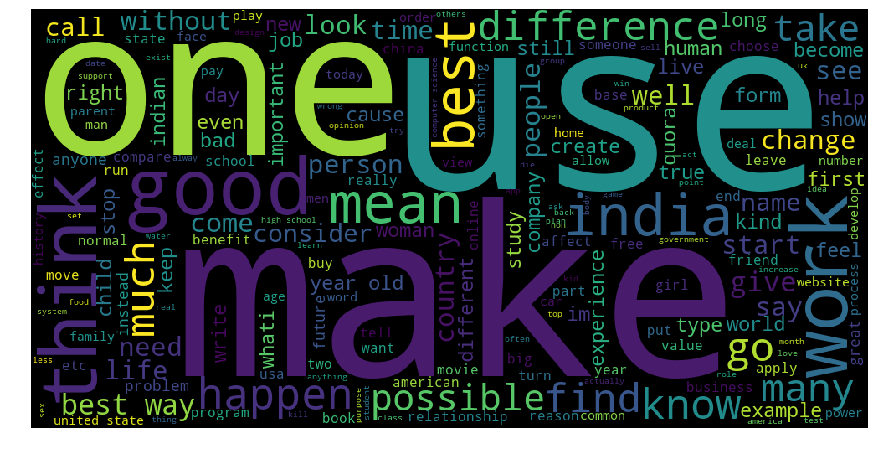

In [53]:
#World Cloud of Sincere Questions after Cleaning the data
display_wordcloud(concatenated_split_train00)

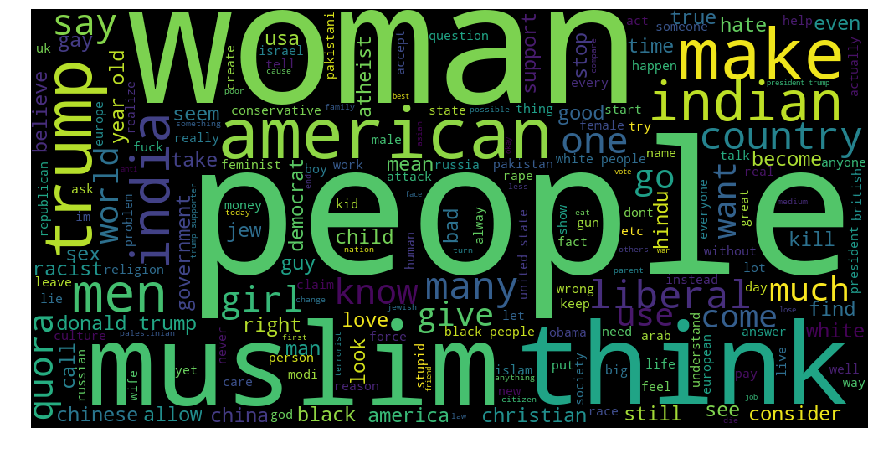

In [54]:
#World Cloud of InSincere Questions after Cleaning the data
display_wordcloud(concatenated_split_train11)